In [21]:
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
import numpy as np
import pandas as pd


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
### DNN Regression
# It is now time to implements single-input and multiple-inputs DNN models
print('---------------------------------------------------------------------------------')
print('Initializing DNN program')
print('---------------------------------------------------------------------------------')
print('')
#---------------------------------------------------------------------
# Importing Libraries

print('---------------------------------------------------------------------------------')
print('Importing Libraries')
print('---------------------------------------------------------------------------------')
print('')

import time
import sklearn
import tensorflow as tf
import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "0"
# from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math
#import keras
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM
#from keras.layers import Dropout
#from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
#from keras.callbacks import EarlyStopping
#from keras.preprocessing import sequence
#from keras.utils import pad_sequences
#from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
import shap
np.random.seed(0)

#---------------------------------------------------------------------
# Defining metric equations

print('---------------------------------------------------------------------------------')
print('Defining Metric Equations')
print('---------------------------------------------------------------------------------')
print('')

def ACC(TP,TN,FP,FN):
    Acc = (TP+TN)/(TP+FP+FN+TN)
    return Acc
def ACC_2 (TP, FN):
    ac = (TP/(TP+FN))
    return ac
def PRECISION(TP,FP):
    Precision = TP/(TP+FP)
    return Precision
def RECALL(TP,FN):
    Recall = TP/(TP+FN)
    return Recall
def F1(Recall, Precision):
    F1 = 2 * Recall * Precision / (Recall + Precision)
    return F1
def BACC(TP,TN,FP,FN):
    BACC =(TP/(TP+FN)+ TN/(TN+FP))*0.5
    return BACC
def MCC(TP,TN,FP,FN):
    MCC = (TN*TP-FN*FP)/(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))**.5)
    return MCC
def AUC_ROC(y_test_bin,y_score):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    auc_avg = 0
    counting = 0
    for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
     # plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
      #print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))
      auc_avg += auc(fpr[i], tpr[i])
      counting = i+1
    return auc_avg/counting
#---------------------------------------------------------------------
# Defining features of interest
print('---------------------------------------------------------------------------------')
print('Defining features of interest')
print('---------------------------------------------------------------------------------')
print('')



# First ensemble with NSL-KDD
# Parameters

#----------------------------------------------
# 0 for not using it as base learner
# 1 for using it as base learner

use_model_ada = 1 
use_model_dnn = 1 
use_model_mlp = 1 
use_model_lgbm = 1 
use_model_rf = 1 
use_model_svm = 1
use_model_knn = 1 
#----------------------------------------------
# 0 for training the model
# 1 for using the saved version of the model

load_model_ada = 0 
load_model_dnn = 0 
load_model_mlp = 0 
load_model_lgbm = 0 
load_model_rf = 0 
load_model_svm = 0
load_model_knn = 0 
#----------------------------------------------

# load_model_ada = 1
# load_model_dnn = 1 
# load_model_mlp = 1 
# load_model_lgbm = 1 
# load_model_rf = 1 
# load_model_svm = 1
# load_model_knn = 1 
#----------------------------------------------
feature_selection_bit = 0
# feature_selection_bit = 1



# Specify the name of the output text file
if feature_selection_bit == 0:
    output_file_name = "ensemble_base_models_all_features.txt"
    with open(output_file_name, "w") as f: print('---------------------------------------------------------------------------------', file = f)
    with open(output_file_name, "a") as f: print('---- ensemble_base_models_all_features', file = f)

elif feature_selection_bit == 1:
    output_file_name = "ensemble_base_models_feature_selection.txt"
    with open(output_file_name, "w") as f: print('---------------------------------------------------------------------------------', file = f)
    with open(output_file_name, "a") as f: print('----ensemble_base_models_feature_selection--', file = f)

#!/usr/bin/env python       
# coding: utf-8

# In[1]:
# importing required libraries
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path


# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

# importing library for plotting
# import matplotlib.pyplot as plt
# import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# from keras.layers import Dense # importing dense layer

# from keras.layers import Input
# from keras.models import Model
# representation of model layers
#from keras.utils import plot_model
from sklearn.metrics import confusion_matrix
import shap

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score
import time




start_program = time.time()



def confusion_metrics (name_model,predictions,true_labels,time_taken):

    name = name_model
    pred_label = predictions
    y_test_01 = true_labels 

    with open(output_file_name, "a") as f: print('--------------------------------------------------------------------------', file = f)

    with open(output_file_name, "a") as f: print(name, file = f)


    print('---------------------------------------------------------------------------------')
    print('CONFUSION MATRIX')
    print('---------------------------------------------------------------------------------')


    # pred_label = label[ypred]

    confusion_matrix = pd.crosstab(y_test_01, pred_label,rownames=['Actual ALERT'],colnames = ['Predicted ALERT'], dropna=False).sort_index(axis=0).sort_index(axis=1)
    all_unique_values = sorted(set(pred_label) | set(y_test_01))
    z = np.zeros((len(all_unique_values), len(all_unique_values)))
    rows, cols = confusion_matrix.shape
    z[:rows, :cols] = confusion_matrix
    confusion_matrix  = pd.DataFrame(z, columns=all_unique_values, index=all_unique_values)
    # confusion_matrix.to_csv('Ensemble_conf_matrix.csv')
    # with open(output_file_name, "a") as f:print(confusion_matrix,file=f)
    print(confusion_matrix)
    with open(output_file_name, "a") as f: print('Confusion Matrix', file = f)

    with open(output_file_name, "a") as f: print(confusion_matrix, file = f)


    FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
    FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
    TP = np.diag(confusion_matrix)
    TN = confusion_matrix.values.sum() - (FP + FN + TP)
    TP_total = sum(TP)
    TN_total = sum(TN)
    FP_total = sum(FP)
    FN_total = sum(FN)

    TP_total = np.array(TP_total,dtype=np.float64)
    TN_total = np.array(TN_total,dtype=np.float64)
    FP_total = np.array(FP_total,dtype=np.float64)
    FN_total = np.array(FN_total,dtype=np.float64)
    FPR = FP / (FP + TN)
    FPR = 100*(sum(FPR)/len(FPR))

    #----------------------------------------------------------------#----------------------------------------------------------------

    print('---------------------------------------------------------------------------------')
    print('METRICS')
    print('---------------------------------------------------------------------------------')


    Acc = accuracy_score(y_test_01, pred_label)
    Precision = precision_score(y_test_01, pred_label, average='macro')
    Recall = recall_score(y_test_01, pred_label, average='macro')
    F1 =  f1_score(y_test_01, pred_label, average='macro')
    BACC = balanced_accuracy_score(y_test_01, pred_label)
    MCC = matthews_corrcoef(y_test_01, pred_label)


    # voting_acc_01 = Acc
    # voting_pre_01 = Precision
    # weighed_avg_rec_01 = Recall
    # weighed_avg_f1_01 = F1
    # weighed_avg_bacc_01 = BACC
    # weighed_avg_mcc_01 = MCC
    # with open(output_file_name, "a") as f:print('Accuracy total: ', Acc,file=f)
    print('Accuracy total: ', Acc)
    print('Precision total: ', Precision )
    print('Recall total: ', Recall )
    print('F1 total: ', F1 )
    print('BACC total: ', BACC)
    print('MCC total: ', MCC)

    with open(output_file_name, "a") as f: print('Accuracy total: ', Acc, file = f)
    with open(output_file_name, "a") as f: print('Precision total: ', Precision, file = f)
    with open(output_file_name, "a") as f: print('Recall total: ', Recall , file = f)
    with open(output_file_name, "a") as f: print('F1 total: ', F1, file = f)
    with open(output_file_name, "a") as f: print('BACC total: ', BACC , file = f)
    with open(output_file_name, "a") as f: print('MCC total: ', MCC, file = f)
    with open(output_file_name, "a") as f: print('Time Taken: ', time_taken, file = f)
    with open(output_file_name, "a") as f: print('FPR: ', FPR, '%' ,file = f)

    return Acc, Precision, Recall, F1, BACC, MCC, FPR




# In[3]:


# attach the column names to the dataset
feature=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count", 
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]
# KDDTrain+_2.csv & KDDTest+_2.csv are the datafiles without the last column about the difficulty score
# these have already been removed.

train='KDDTrain+.txt'
test='KDDTest+.txt'

df=pd.read_csv(train,names=feature)
df_test=pd.read_csv(test,names=feature)



# shape, this gives the dimensions of the dataset
print('Dimensions of the Training set:',df.shape)
print('Dimensions of the Test set:',df_test.shape)


df.drop(['difficulty'],axis=1,inplace=True)
df_test.drop(['difficulty'],axis=1,inplace=True)



print('Label distribution Training set:')
print(df['label'].value_counts())
print()
print('Label distribution Test set:')
print(df_test['label'].value_counts())



# colums that are categorical and not binary yet: protocol_type (column 2), service (column 3), flag (column 4).
# explore categorical features
print('Training set:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

#see how distributed the feature service is, it is evenly distributed and therefore we need to make dummies for all.
print()
print('Distribution of categories in service:')
print(df['service'].value_counts().sort_values(ascending=False).head())



# Test set
print('Test set:')
for col_name in df_test.columns:
    if df_test[col_name].dtypes == 'object' :
        unique_cat = len(df_test[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))


from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['protocol_type', 'service', 'flag']
# insert code to get a list of categorical columns into a variable, categorical_columns
categorical_columns=['protocol_type', 'service', 'flag'] 
 # Get the categorical values into a 2D numpy array
df_categorical_values = df[categorical_columns]
testdf_categorical_values = df_test[categorical_columns]
df_categorical_values.head()


# protocol type
unique_protocol=sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
# service
unique_service=sorted(df.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
# flag
unique_flag=sorted(df.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)

#do same for test set
unique_service_test=sorted(df_test.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2




df_categorical_values_enc=df_categorical_values.apply(LabelEncoder().fit_transform)
print(df_categorical_values_enc.head())
# test set
testdf_categorical_values_enc=testdf_categorical_values.apply(LabelEncoder().fit_transform)



enc = OneHotEncoder()
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)
# test set
testdf_categorical_values_encenc = enc.fit_transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(),columns=testdumcols)

df_cat_data.head()


trainservice=df['service'].tolist()
testservice= df_test['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference

for col in difference:
    testdf_cat_data[col] = 0

testdf_cat_data.shape

newdf=df.join(df_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)
# test data
newdf_test=df_test.join(testdf_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)
print(newdf.shape)
print(newdf_test.shape)


# take label column
labeldf=newdf['label']
labeldf_test=newdf_test['label']
# change the label column
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
# put the new label column back
newdf['label'] = newlabeldf
newdf_test['label'] = newlabeldf_test
print(newdf['label'].head())


# Specify your selected features. Note that you'll need to modify this list according to your final processed dataframe
#Uncomment the below lines to use these top 20 features from shap analysis
#selected_features = ["root_shell","service_telnet","num_shells","service_uucp","dst_host_same_src_port_rate"
#                     ,"dst_host_rerror_rate","dst_host_srv_serror_rate","dst_host_srv_count","service_private","logged_in",
#                    "dst_host_serror_rate","serror_rate","srv_serror_rate","flag_S0","diff_srv_rate","dst_host_srv_diff_host_rate","num_file_creations","flag_RSTR"#,"dst_host_same_srv_rate","service_Idap","label"]
                     

# Select those features from your dataframe
#newdf = newdf[selected_features]
#newdf_test = newdf_test[selected_features]

# Now your dataframe only contains your selected features.

# creating a dataframe with multi-class labels (Dos,Probe,R2L,U2R,normal)
multi_data = newdf.copy()
multi_label = pd.DataFrame(multi_data.label)

multi_data_test=newdf_test.copy()
multi_label_test = pd.DataFrame(multi_data_test.label)


# using standard scaler for normalizing
std_scaler = StandardScaler()
def standardization(df,col):
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
    return df

numeric_col = multi_data.select_dtypes(include='number').columns
data = standardization(multi_data,numeric_col)
numeric_col_test = multi_data_test.select_dtypes(include='number').columns
data_test = standardization(multi_data_test,numeric_col_test)

# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
le2 = preprocessing.LabelEncoder()
le2_test = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
enc_label_test = multi_label_test.apply(le2_test.fit_transform)
multi_data = multi_data.copy()
multi_data_test = multi_data_test.copy()

multi_data['intrusion'] = enc_label
multi_data_test['intrusion'] = enc_label_test

#y_mul = multi_data['intrusion']
multi_data
multi_data_test



multi_data.drop(labels= [ 'label'], axis=1, inplace=True)
multi_data
multi_data_test.drop(labels= [ 'label'], axis=1, inplace=True)
multi_data_test


y_train_multi= multi_data[['intrusion']]
X_train_multi= multi_data.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',X_train_multi.shape,'\ny_train has shape:',y_train_multi.shape)

y_test_multi= multi_data_test[['intrusion']]
X_test_multi= multi_data_test.drop(labels=['intrusion'], axis=1)

print('X_test has shape:',X_test_multi.shape,'\ny_test has shape:',y_test_multi.shape)


from collections import Counter

label_counts = Counter(y_train_multi['intrusion'])
print(label_counts)


from sklearn.preprocessing import LabelBinarizer

y_train_multi = LabelBinarizer().fit_transform(y_train_multi)

y_test_multi = LabelBinarizer().fit_transform(y_test_multi)


Y_train=y_train_multi.copy()
X_train=X_train_multi.copy()

Y_test=y_test_multi.copy()
X_test=X_test_multi.copy()


from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification

# Assuming you have features X and labels Y
# X, Y = make_classification()

ros = RandomOverSampler(sampling_strategy='minority', random_state=100)

X_train, Y_train = ros.fit_resample(X_train, Y_train)


# In[33]:


print(Y_test)


# In[34]:


X_train.values


# In[35]:
single_class_train = np.argmax(y_train_multi, axis=1)
single_class_test = np.argmax(y_test_multi, axis=1)


df1 = X_train_multi.assign(Label = single_class_train)
df2 =  X_test_multi.assign(Label = single_class_test)

frames = [df1,  df2]

df = pd.concat(frames,ignore_index=True)


df_fs = df

y = df.pop('Label')
X = df

print('---------------------------------------------------------------------------------')
print('Separating datasets')
print('---------------------------------------------------------------------------------')
print('')

test2 = X.assign(ALERT = y)


# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)

Dos_samples = test2[test2['ALERT'] == 0]
Normal_samples = test2[test2['ALERT'] == 1]
Probe_samples = test2[test2['ALERT'] == 2]
R2L_samples = test2[test2['ALERT'] == 3]
U2R_samples = test2[test2['ALERT'] == 4]

Probe_y = Probe_samples.pop('ALERT')
Dos_y = Dos_samples.pop('ALERT')
Normal_y = Normal_samples.pop('ALERT')
U2R_y = U2R_samples.pop('ALERT')
R2L_y = R2L_samples.pop('ALERT')


test2.pop('ALERT')




df = X.assign(Label = y)


# y = df.pop('Label')
# X = df

y1, y2 = pd.factorize(y)

y_0 = pd.DataFrame(y1)
y_1 = pd.DataFrame(y1)
y_2 = pd.DataFrame(y1)
y_3 = pd.DataFrame(y1)
y_4 = pd.DataFrame(y1)


# y_0 = y_0.replace(0, 0)
# y_0 = y_0.replace(1, 1)
y_0 = y_0.replace(2, 1)
y_0 = y_0.replace(3, 1)
y_0 = y_0.replace(4, 1)


y_1 = y_1.replace(1, 999)
y_1 = y_1.replace(0, 1)
# y_1 = y_1.replace(1, 0)
y_1 = y_1.replace(2, 1)
y_1 = y_1.replace(3, 1)
y_1 = y_1.replace(4, 1)
y_1 = y_1.replace(999, 1)


y_2 = y_2.replace(0, 1)
y_2 = y_2.replace(1, 1)
y_2 = y_2.replace(2, 0)
y_2 = y_2.replace(3, 1)
y_2 = y_2.replace(4, 1)


y_3 = y_3.replace(0, 1)
# y_3 = y_3.replace(1, 1)
y_3 = y_3.replace(2, 1)
y_3 = y_3.replace(3, 0)
y_3 = y_3.replace(4, 1)


y_4 = y_4.replace(0, 1)
# y_4 = y_4.replace(1, 1)
y_4 = y_4.replace(2, 1)
y_4 = y_4.replace(3, 1)
y_4 = y_4.replace(4, 0)



df = df.assign(Label = y)

#Divide the dataset between level 00 and level 01
import sklearn
from sklearn.model_selection import train_test_split
# split = 0.7 # 0.5

# # X_00,X_01, y_00, y_01 = sklearn.model_selection.train_test_split(X, y, train_size=split)
# X_train,X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=split)

# Separate Training and Testing db
print('---------------------------------------------------------------------------------')
print('Separating Training and Testing db')
print('---------------------------------------------------------------------------------')
print('')

X_train,X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.7,random_state=42)
df = X.assign( Label = y)

y_train
import numpy as np

import tensorflow as tf

# Now you can use Keras modules directly from tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Flatten
import innvestigate
tf.compat.v1.disable_eager_execution()
from tensorflow.keras.callbacks import LearningRateScheduler

print('---------------------------------------------------------------------------------')
print('Defining the DNN model')
print('---------------------------------------------------------------------------------')
print('')

# dropout_rate = 0.01
# nodes = (len(X_train.columns,) + 5 //2) 
nodes = 5
print(nodes)

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(len(X_train.columns,))))

model.add(tf.keras.layers.Dense(nodes, activation='relu'))
# model.add(tf.keras.layers.Dense(nodes, activation='relu'))



# model.add(tf.keras.layers.Dense(nodes, activation='relu'))
# model.add(tf.keras.layers.Dense(nodes, activation='relu'))
# model.add(tf.keras.layers.Dense(nodes, activation='relu'))
# model.add(tf.keras.layers.Dense(nodes, activation='relu'))
# model.add(tf.keras.layers.Dense(nodes, activation='relu'))
model.add(tf.keras.layers.Dense(5))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()
#---------------------------------------------------------------------

# # Define your DNN model
# model = Sequential([
#     Flatten(input_shape=(28, 28)),  # Input layer
#     Dense(128, activation='relu'),  # Hidden layer
#     Dense(10, activation='relu')  # Output layer
# ])

# # Compile the model
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])



# # Save the trained model
# model.save('your_model.h5')

# # Load your trained model
# model = tf.keras.models.load_model('your_model.h5')

from tensorflow.keras.callbacks import EarlyStopping
start = time.time()

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)

# Modify model.fit to include the EarlyStopping callback
# model.fit(X_train, y_train, epochs=1000, batch_size=len(X_train), callbacks=[early_stopping,lr_scheduler])
model.fit(X_train, y_train, epochs=1000, batch_size=len(X_train), callbacks=[early_stopping])

# Pass the lr_scheduler callback to your model.fit() function
# model.fit(X_train, y_train, callbacks=[lr_scheduler], ...)


end = time.time()
print('---------------------------------------------------------------------------------')
print('ELAPSE TIME TRAINING MODEL: ',(end - start)/60, 'min')
print('---------------------------------------------------------------------------------')
print('')


print('---------------------------------------------------------------------------------')
print('Model Prediction')
print('---------------------------------------------------------------------------------')
print('')
print('---------------------------------------------------------------------------------')
start = time.time()
y_pred = model.predict(X_test)
end = time.time()
print('ELAPSE TIME MODEL PREDICTION: ',(end - start)/60, 'min')
print('---------------------------------------------------------------------------------')
print('')

#print(y_pred)
ynew = np.argmax(y_pred,axis = 1)
#print(ynew)
score = model.evaluate(X_test, y_test,verbose=1)
#print(score)
label = y2
# pred_label = label[ynew]
#print(score)

#---------------------------------------------------------------------
# pd.crosstab(test['ALERT'], preds, rownames=['Actual ALERT'], colnames = ['Predicted ALERT'])

from sklearn.metrics import accuracy_score

from collections import Counter

label_counts = Counter(y_test)
print(label_counts)

label_counts = Counter(ynew)
print(label_counts)

accuracy =accuracy_score(y_test, ynew)*100
print(accuracy)

---------------------------------------------------------------------------------
Initializing DNN program
---------------------------------------------------------------------------------

---------------------------------------------------------------------------------
Importing Libraries
---------------------------------------------------------------------------------

---------------------------------------------------------------------------------
Defining Metric Equations
---------------------------------------------------------------------------------

---------------------------------------------------------------------------------
Defining features of interest
---------------------------------------------------------------------------------

Dimensions of the Training set: (125973, 43)
Dimensions of the Test set: (22544, 43)
Label distribution Training set:
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2

In [10]:
# y2

In [22]:
train = X_train
test = X_test
labels_train = y_train
labels_test = y_test

In [23]:
label = ['Dos','normal','Probe','R2L','U2R']
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)


In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
x_axis = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]

In [26]:
explainer = shap.DeepExplainer(model,train.values.astype('float'))


In [27]:
#Define function to test sample with the waterfall plot
def waterfall_explanator(sample):

    # explainer = shap.DeepExplainer(model,train.values.astype('float'))
    shap_values = explainer.shap_values(sample.values.astype('float'))
    # print('SHAP VALUES',shap_values)
    # print('SHAP VALUES LEN',len(shap_values))
    index = np.argmax(model.predict(sample)) # Prediction of the sample
    # print('INDEX PREDICTION',index)
    # print('SHAP VALUES FOR INDEX',shap_values[index])
    vals= np.abs(shap_values[index])
    # print('ABSOLUTE VALUES',vals)
    # vals = vals.mean()
    # print('ABSOLUTE VALUUS MEAN',vals)
    # vals= np.abs(shap_values).mean(index)
    feature_importance = pd.DataFrame(list(zip(train.columns, sum(vals))), columns=['col_name','feature_importance_vals'])
    feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)
    feature_importance.head()

    shap_val = list(feature_importance['feature_importance_vals'])
    prediction = index
    feature_name = list(feature_importance['col_name'])
    feature_val = []
    for j in feature_name:
        feature_val.append(float(sample[j]))
    # print(prediction, shap_val,feature_val,feature_name)        

    return (prediction, shap_val,feature_val,feature_name)

In [28]:
def completeness_all(single_class_samples,number_samples, number_of_features_pertubation):
    Bucket = {
    '0.0': 0,
    '0.1':0,
    '0.2':0,
    '0.3':0,
    '0.4':0,
    '0.5':0,
    '0.6':0,
    '0.7':0,
    '0.8':0,
    '0.9':0,
    '1.0':0,

           }
    # Counter_chart = 0
    Counter_all_samples = 0
    counter_samples_changed_class = 0
    print('------------------------------------------------')
    print('Initiating Completeness Experiment')
    print('------------------------------------------------')
    for i in range(0,number_samples):
        #select sample
        try:
            sample = single_class_samples[i:i+1]
        except:
            break # break if there more samples requested than samples in the dataset
        # Explanate the original sample
        u = waterfall_explanator(sample)
        #select top 5 features from the original sample
        top_k_features = []
        top_k_features.append(u[3][0]) #append first feature
        break_condition = False
        for k in range(1,number_of_features_pertubation):
            for j in range(11):  # 11 steps to include 1.0 (0 to 10)
                if break_condition == True: break
                perturbation = j / 10.0  # Divide by 10 to get steps of 0.1
                temp_var = sample[top_k_features[k-1]]
                result = np.where((temp_var - perturbation) < 0, True, False)
                if result < 0: 
                    sample[top_k_features[k-1]] = 1 - perturbation
                else: sample[top_k_features[k-1]] = temp_var - perturbation
                # sample[top_k_features[k-1]] = perturbation
                v = waterfall_explanator(sample)
                if v[0] != u[0]: 
                    # print(str(perturbation))
                    Bucket[str(perturbation)] += 1              
                    break_condition = True
                    counter_samples_changed_class += 1     
                    # Bucket[str(perturbation)] = counter_samples_changed_class              
                    break
                else: sample[top_k_features[k-1]] = abs(temp_var - 1) # set the sample feature value as the symetric opposite
            # print(u)
            top_k_features.append(u[3][k]) #append second, third feature .. and so on
            if break_condition == True: break
        Counter_all_samples += 1
        progress  = 100*Counter_all_samples/number_samples
        if progress%10 == 0: print('Progress', progress ,'%')
    # print('Number of Normal samples that changed classification: ',counter_samples_changed_class)
    # print('Number of all samples analyzed: ',Counter_all_samples)
    # for key in Bucket:
    #     Bucket[key]=number_samples - Bucket[key]
    # Bucket['0.0'] = number_samples
    # for key in Bucket:
    #     Bucket[key]=Bucket[key]
    dict = Bucket
    temp = 0
    for k in dict:
        dict[k] = dict[k] + temp
        temp = dict[k]
    total = number_samples
    y_axis = []
    for k in dict:
        dict[k] = abs(dict[k] - total)
        y_axis.append(dict[k]/total)    
    return(counter_samples_changed_class,Counter_all_samples,y_axis)
        

In [34]:
K_samples = 500
# K_feat =  Dos_samples.shape[1]
K_feat =  3
num_samples = K_samples
num_feat_pertubation = K_feat
output_file_name = 'DNN_DL_NSL_Completeness.txt'


In [11]:
# Dos_samples

In [12]:

p = completeness_all(Dos_samples,num_samples,num_feat_pertubation)
print(p)
print('Number of DoS samples that changed classification: ',p[0])
print('Number of all samples analyzed: ',p[1])
percentage = 100*p[0]/p[1]
print(percentage,'%','- samples are complete ')
y_axis_dos = p[2]


------------------------------------------------
Initiating Completeness Experiment
------------------------------------------------
Progress 10.0 %
Progress 20.0 %
Progress 30.0 %
Progress 40.0 %
Progress 50.0 %
Progress 60.0 %
Progress 70.0 %
Progress 80.0 %
Progress 90.0 %
Progress 100.0 %
(24, 500, [1.0, 1.0, 0.988, 0.984, 0.976, 0.974, 0.966, 0.958, 0.958, 0.956, 0.952])
Number of DoS samples that changed classification:  24
Number of all samples analyzed:  500
4.8 % - samples are complete 


In [13]:
with open(output_file_name, "w") as f:print('',file = f)
with open(output_file_name, "a") as f:print('y_axis_dos = [',y_axis_dos ,']',file = f)

In [14]:


p = completeness_all(Normal_samples,num_samples,num_feat_pertubation)
print(p)
print('Number of Normal samples that changed classification: ',p[0])
print('Number of all samples analyzed: ',p[1])
percentage = 100*p[0]/p[1]
print(percentage,'%','- samples are complete ')
y_axis_normal = p[2]
with open(output_file_name, "a") as f:print('y_axis_normal = [',y_axis_normal ,']',file = f)


------------------------------------------------
Initiating Completeness Experiment
------------------------------------------------
Progress 10.0 %
Progress 20.0 %
Progress 30.0 %
Progress 40.0 %
Progress 50.0 %
Progress 60.0 %
Progress 70.0 %
Progress 80.0 %
Progress 90.0 %
Progress 100.0 %
(33, 500, [1.0, 0.992, 0.982, 0.974, 0.97, 0.958, 0.956, 0.946, 0.934, 0.934, 0.934])
Number of Normal samples that changed classification:  33
Number of all samples analyzed:  500
6.6 % - samples are complete 


In [15]:

p = completeness_all(Probe_samples,num_samples,num_feat_pertubation)
print(p)
print('Number of Probe samples that changed classification: ',p[0])
print('Number of all samples analyzed: ',p[1])
percentage = 100*p[0]/p[1]
print(percentage,'%','- samples are complete ')
y_axis_probe = p[2]
with open(output_file_name, "a") as f:print('y_axis_probe = [',y_axis_probe ,']',file = f)


------------------------------------------------
Initiating Completeness Experiment
------------------------------------------------
Progress 10.0 %
Progress 20.0 %
Progress 30.0 %
Progress 40.0 %
Progress 50.0 %
Progress 60.0 %
Progress 70.0 %
Progress 80.0 %
Progress 90.0 %
Progress 100.0 %
(87, 500, [1.0, 0.956, 0.924, 0.9, 0.862, 0.86, 0.854, 0.852, 0.834, 0.834, 0.826])
Number of Probe samples that changed classification:  87
Number of all samples analyzed:  500
17.4 % - samples are complete 


In [16]:

p = completeness_all(R2L_samples,num_samples,num_feat_pertubation)
print(p)
print('Number of R2L_samples samples that changed classification: ',p[0])
print('Number of all samples analyzed: ',p[1])
percentage = 100*p[0]/p[1]
print(percentage,'%','- samples are complete ')
y_axis_R2L = p[2]
with open(output_file_name, "a") as f:print('y_axis_R2L = [',y_axis_R2L ,']',file = f)


------------------------------------------------
Initiating Completeness Experiment
------------------------------------------------


In [36]:
# len(U2R_samples)

119

In [38]:
# p = completeness_all(U2R_samples,num_samples,num_feat_pertubation)

p = completeness_all(U2R_samples,100,num_feat_pertubation)
print(p)
print('Number of U2R samples that changed classification: ',p[0])
print('Number of all samples analyzed: ',p[1])
percentage = 100*p[0]/p[1]
print(percentage,'%','- samples are complete ')
y_axis_U2R = p[2]
with open(output_file_name, "a") as f:print('y_axis_U2R = [',y_axis_U2R ,']',file = f)


------------------------------------------------
Initiating Completeness Experiment
------------------------------------------------
Progress 10.0 %
Progress 20.0 %
Progress 30.0 %
Progress 40.0 %
Progress 50.0 %
Progress 60.0 %
Progress 70.0 %
Progress 80.0 %
Progress 90.0 %
Progress 100.0 %
(7, 100, [1.0, 0.97, 0.96, 0.94, 0.94, 0.94, 0.94, 0.94, 0.93, 0.93, 0.93])
Number of U2R samples that changed classification:  7
Number of all samples analyzed:  100
7.0 % - samples are complete 


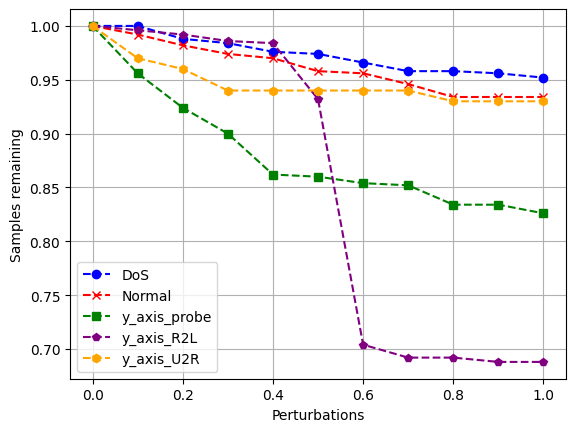

<Figure size 640x480 with 0 Axes>

In [39]:
import matplotlib.pyplot as plt 
plt.clf()
x_axis = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]

y_axis_dos = [1.0, 1.0, 0.988, 0.984, 0.976, 0.974, 0.966, 0.958, 0.958, 0.956, 0.952]
y_axis_normal = [1.0, 0.992, 0.982, 0.974, 0.97, 0.958, 0.956, 0.946, 0.934, 0.934, 0.934]
y_axis_probe = [1.0, 0.956, 0.924, 0.9, 0.862, 0.86, 0.854, 0.852, 0.834, 0.834, 0.826] 
y_axis_R2L = [1.0, 0.996, 0.992, 0.986, 0.984, 0.932, 0.704, 0.692, 0.692, 0.688, 0.688] 
y_axis_U2R =  [1.0, 0.97, 0.96, 0.94, 0.94, 0.94, 0.94, 0.94, 0.93, 0.93, 0.93] 

# Plot the first line
plt.plot(x_axis, y_axis_dos, label='DoS', color='blue', linestyle='--', marker='o')
# plt.plot(x_axis, y_axis_dos)


# Plot the second line
plt.plot(x_axis, y_axis_normal, label='Normal', color='red', linestyle='--', marker='x')

# Plot the third line
plt.plot(x_axis, y_axis_probe, label='y_axis_probe', color='green', linestyle='--', marker='s')

# Plot the fourth line
plt.plot(x_axis, y_axis_R2L, label='y_axis_R2L', color='purple', linestyle='--', marker='p')

# Plot the fifth line
plt.plot(x_axis, y_axis_U2R, label='y_axis_U2R', color='orange', linestyle='--', marker='h')

# # Plot the sixth line
# plt.plot(x_axis, y_axis_web, label='Web Attack', color='magenta', linestyle='--', marker='+')

# # Plot the seventh line
# plt.plot(x_axis, y_axis_brute, label='Brute Force', color='cyan', linestyle='--', marker='_')

# Enable grid lines (both major and minor grids)
plt.grid()

# Customize grid lines (optional)
# plt.grid()

# Add labels and a legend
plt.xlabel('Perturbations')
plt.ylabel('Samples remaining')
plt.legend()

# Set the title of the plot
# plt.title('Accuracy x Features - SHAP SML')

# Show the plot
plt.show()
plt.savefig('DNN_DL_NSL_Completeness.png')
plt.clf()